<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/GraphModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Modeling

In this section, we briefly review some of the common notation used in graphs. Any graph consists of both a set of objects, called nodes, and the connections between these nodes, called edges. Mathematically, a graph $G$ is denoted as pair $G(V, E)$, where $V=\left\{v_{1}, v_{2}, \ldots v_{n}\right\}$ represents the set of nodes and $E=$ $\left\{e_{1}, e_{2}, \ldots, e_{m}\right\}$ represents the set of edges and the size of the set is commonly shown as $m=|E|$. Edges are also represented by their endpoints (nodes), so $e\left(v_{1}, v_{2}\right)$ or $\left(v_{1}, v_{2}\right)$ defines an edge between nodes $v_{1}$ and $v_{2}$. Edges can have directions if one node is connected to another, but not vice versa. When edges have directions, $e\left(v_{1}, v_{2}\right)$ is not the same as $e\left(v_{2}, v_{1}\right)$. When edges are undirected, nodes are connected both ways and are called undirected edges and this kind of graph is called an undirected graph. Graphs that only have directed edges are called directed graphs and ones that only have undirected edges are called undirected graphs. Finally, mixed graphs have both directed and undirected edges.

A sequence of edges where nodes and edges are distinct, $e_{1}\left(v_{1}, v_{2}\right), e_{2}\left(v_{2}, v_{3}\right)$, $e_{3}\left(v_{3}, v_{4}\right), \ldots, e_{i}\left(v_{i}, v_{i+1}\right)$, is called a path. A closed path is called a cycle. The length of a path or cycle is the number of edges traversed in the path or cycle. In a directed graph, we only count directed paths because traversal of edges is only allowed in the direction of the edges. For a connected graph, multiple paths can exist between any pair of nodes. Often, we are interested in the path that has the shortest length. This path is called the shortest path. We will also use the shortest path as distance for modeling on networks. The concept of the neighborhood of a node $v_{i}$ can be generalized using shortest paths. An $n$-hop neighborhood of node $v_{i}$ is the set of nodes that are within $n$ hops distance from the node $v_{i}$.

The degree of a node in a graph, which is the number of edges connected to the node, plays a significant role in the study of graphs. For a directed graph, there are two types of degrees 1 ) in-degrees (edges toward the node) and 2 ) out-degrees (edges away from the node). In a network, nodes with the most connections possess the greatest degree of centrality. Degree centrality measures relative levels of importance. We often regard people with many interpersonal connections to be more important than those with few. Indegree centrality describes the popularity of a node and its prominence or prestige. Out-degree centrality describes the gregariousness of the node. For social media, degree represents the number of friends for each given user. On Facebook, a degree represents the number of friends. For Twitter, in-degree and out-degree show the number of followers and followees respectively.

## Laplacian Matrix

A graph with $n$ nodes can be represented by a $n \times n$ adjacency matrix. A value of 1 at row $i$, column $j$ in the adjacency matrix indicates a connection between nodes $v_{i}$ and $v_{j}$, and a value of 0 denotes no connection between the two nodes. When generalized, any real number can be used to show the strength of connection between two nodes. In directed graphs, we can have two edges between $i$ and $j$ (one from $i$ to $j$ and one from $j$ to $i$ ), whereas in undirected graphs only one edge can exist. As a result, the adjacency matrix for directed graphs is not in general symmetric, whereas the adjacency matrix for undirected graphs is symmetric $\left(A=A^{T}\right)$. In social media, there are many directed and undirected networks. For instance, Facebook is an undirected network and Twitter is a directed network.

Consider a weighted graph $G=(V, E)$ with $n$ vertices and $m$ edges each with weights $E_{i, j}$ connecting nodes $i, j$. The adjacency of matrix $M$ of a graph is defined by $M_{i j}=E_{i j}$ if there is an edge $\{i, j\}$ and $M_{i j}=0$, otherwise. The Laplacian matrix $L$ of $\mathrm{G}$ is an $n$ by $n$ symmetric matrix, with one row and column for each vertex, such that
$$
L_{i j}=\left\{\begin{array}{lr}
\sum_{k} E_{i k}, & i=j \\
-E_{i j}, & i \neq j, \text { and } v_{i} \text { is adjacent to } v_{j} \\
0, & \text { otherwise }
\end{array}\right.
$$
In addition, a $n \times m$ incidence matrix of $G$, denoted by $I_{G}$ has one row per vertex and one column per edge. The column corresponding to edge $\{i, j\}$ of $I_{G}$ is zero except the $i$-th and $j$-th entries, which are $\sqrt{E_{i j}}$ and $-\sqrt{E_{i j}}$. respectively. Adjacent matrix can effectively describe a graph as demonstrated in the following two examples.

We can implement these concepts in Python. Using the networkx library, we create a simple, undirected graph with four nodes. Using built-in functions, we can easily acquire the Laplacian and adjacency matrices. We verify these results by calculating the Laplacian matrix explicitly. The results are displayed below.

Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]

Laplacian Matrix:
[[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]


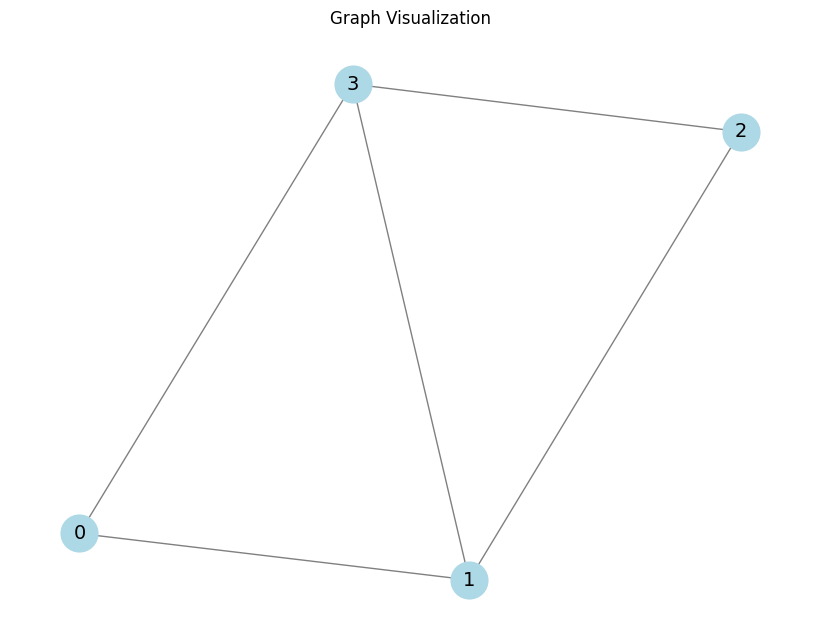


Degree Matrix:
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]

Manually Computed Laplacian Matrix:
[[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)])

# Step 2: Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G).toarray()

# Step 3: Display the adjacency matrix and the Laplacian matrix
print("Adjacency Matrix:")
print(nx.adjacency_matrix(G).toarray())

print("\nLaplacian Matrix:")
print(laplacian_matrix)

# Step 4: Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=14)
plt.title("Graph Visualization")
plt.show()

# Step 5: Verify the Laplacian manually (D - A)
degree_matrix = np.diag([val for _, val in G.degree()])
adjacency_matrix = nx.adjacency_matrix(G).toarray()
manual_laplacian = degree_matrix - adjacency_matrix

print("\nDegree Matrix:")
print(degree_matrix)

print("\nManually Computed Laplacian Matrix:")
print(manual_laplacian)

# Confirm that both matrices are the same
assert np.array_equal(laplacian_matrix, manual_laplacian), "Laplacian matrices do not match!"
